<a href="https://colab.research.google.com/github/orlandxrf/curso-dl/blob/main/notebooks/2b_Retropropagacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo de propagación hacia atrás
"Backpropagation" es un algoritmo para minimizar nuestra función de costo. Nuestro objetivo es calcular:<br>
<br>

$min_{\Theta}J(\Theta)$<br>
<br>

Es decir, queremos minimizar nuestra función de costo $J$ usando un conjunto óptimo de parámetros en $\Theta$. En este algoritmo se veran las ecuaciones que usamos para calcular la derivada parcial de $J(\Theta)$:<br>
<br>

Dado el conjunto de entrenamiento $\{(x^{\{1\}}, y^{\{1\}}) \cdots (x^{\{m\}}, y^{\{m\}})\}$<br>
Establecemos $\Delta^{(l)}_{i,j}:=0$ para todo $(l,i,j)$, (se puede ver como una matriz llena de ceros). $\Delta$ se usa para calcular la derivada parcial de $\frac{\partial}{\partial \Theta^{(l)}_{i,j}} J(\Theta)$ <br>
<br>
Para la muestra de entrenamiento $t=1$ to $m:$<br>
<br>
1. Establecer $a^{(1)}:=x^{(t)}$
2. Realizar la propagación hacia adelante para 
![Cálculo del Gradiente](https://drive.google.com/uc?id=1aKgnISykvWK1pl6Fdbr6wIUpim9MNPeL)
3. Usando $y^{(t)}$, calcular $\delta^{(L)}=a^{(L)}-y^{(L)}$.
4. Calcular $\delta^{(L-1)}, \delta^{(L-2)}, \dots, \delta^{(2)}$ usando $\delta^{(l)}=((\Theta^{l})^{T} \delta^{l+1}) \cdot a^{(l)} \cdot (1-a^{(l)})$

  Los valores delta ($\delta$) de la capa $l$ se calculan multiplicando los valores delta en la siguiente capa con la matriz $\Theta$ de la capa $l$. Luego hacemos la multiplicación de elementos (element-wise) con una función de activación llamada $g'$ (g-prime), que es la derivada de la función de activación $g$ evaluada con los valores de entrada dados por $z^{(l)}$.<br>
<br>
Los términos derivados de $g'$ también se pueden escribir como:<br>
<br>
$g'(z^{(l)}) = a^{(l)} \cdot (1-a^{(l)})$

5. $\Delta^{(l)}_{i,j} := \Delta^{(l)}_{i,j} + a^{(l)}_{j} \delta^{(l+1)}_{i}$ o con vectorización, $\Delta^{(l)} := \Delta^{(l)} + \delta^{(l+1)}(a^{(l)})^{T}$<br>
<br>
  Por lo tanto, actualizamos nuestra matriz $\Delta$.<br>
  

*   $D^{(l)}_{i,j} := \frac{1}{m} (\Delta^{(l)}_{i,j} + \lambda \Theta^{(l)}_{i,j})$, si $j \neq 0$
*   $D^{(l)}_{i,j} := \frac{1}{m} \Delta^{(l)}_{i,j}$ si $j = 0$
<br><br>
  La matriz $D$ se usa como un "acumulador" para sumar nuestros valores a medida que avanzamos y eventualmente calcular nuestra derivada parcial. Así obtenemos $\frac{\partial}{\partial \Theta^{(l)}_{i,j}} J(\Theta) = D^{(l)}_{i,j}$




## Propagación hacia adelante
![Forward](https://drive.google.com/uc?id=1ytZVP5pL8RUHUtRCs_hU-SMAIsIUxw0M)
<br>
$z^{(3)}_{1} = \Theta^{(2)}_{1,0} \cdot 1 + \Theta^{(2)}_{1,1} \cdot a^{(2)}_{1} + \Theta^{(2)}_{1,2} \cdot a^{(2)}_{2}$<br>
<br>
## Propagación hacia atrás
![Backward](https://drive.google.com/uc?id=1vVfuBxgWIbJlbgA7F0ZBSUei10_Ubzy7)

$\delta^{(l)}_{j} =$ el costo de error para $a^{(l)}_{j}$ (unidad $j$ en la capa $l$).<br>
<br>

$\delta^{(4)}_{j} = a^{(4)}_{j} - y_{j} = (h_{\Theta}(x))_{j} - y_{j}$<br>
<br>

$\delta^{(3)}_{j} = (\Theta^{(3)}_{j})^{T} \delta^{(4)}_{j} \cdot g'(z^{(3)}_{j})$ , donde $g'(z^{(3)}_{j}) = a^{(3)}_{j} \cdot (1 - a^{(3)}_{j})$<br>
<br>

$\delta^{(2)}_{j} = (\Theta^{(2)}_{j})^{T} \delta^{(3)}_{j} \cdot g'(z^{(2)_{j}})$ , donde $g'(z^{(2)}_{j}) = a^{(2)}_{j} \cdot (1 - a^{(2)}_{j})$<br>
<br>

No hay $\delta^{(1)}$ porque la primera capa corresponde a la capa de entrada, y eso es simplemente son las características que observamos en nuestro conjunto de entrenamiento. Así que no hay errores asociados a éstas.

<br>
$\delta^{(3)}_{2} = \Theta^{(3)}_{1,2} \cdot \delta^{(4)}_{1}$
<br>

<br>
$\delta^{(2)}_{2} = \Theta^{(2)}_{1,2} \cdot \delta^{(3)}_{1} + \Theta^{(2)}_{2,2} \cdot \delta^{(3)}_{2}$
<br>

Formalmente, $\delta^{(l)}_{j} = \frac{\partial}{\partial z^{(l)}_{j}} cost(t)$ (para $j \geq 0$), 
<br>donde $cost(t) = y^{t} log(h_{\Theta}(x^{(t)})) + (1 - y^{t}) log(1 - h_{\Theta}(x^{t}))$

# Ejemplo de una Red neuronal
![Diagrama](https://drive.google.com/uc?id=1Lfl5ko4CaIolASdva0pKhydaMMrE3VRP)
<br>
Donde:<br>
<br>
$x$ son las entradas y $y$ son las etiquetas.<br>
$w$ son los pesos y $b$ es el sesgo.<br>
$a$ es la "pre-activación" la multiplicación de los pesos ponderados más el sesgo:<br>
$a_{1} = w_{1} \cdot x_{1} + w_{2} \cdot x_{2} + b_{1}$<br>
$a_{2} = w_{3} \cdot x_{1} + w_{4} \cdot x_{2} + b_{2}$<br>
$a_{3} = w_{5} \cdot h_{1} + w_{6} \cdot h_{2} + b_{3}$<br>
$h$ es la "post-activación", calcula la función de activación: $h_{1} = sigmoid(a_{1})$<br>
<br>
Iniciamos definiendo un conjunto de datos aleatorio de 1000

In [1]:
# Generar 1000 datos con 4 etiquetas (0,1,2,3) con 2 características
from sklearn.datasets import make_blobs

# "make_blobs" para generar datos aleatoriamente de puntos con una distribución Gaussiana.
data, labels = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)
print(data.shape, labels.shape)
print(f"etiquetas: {labels[:10]}") # visualizar las primeras 10 etiquetas

(1000, 2) (1000,)
etiquetas: [0 0 0 1 1 0 1 0 0 1]


Visualizar el conjunto de datos generado, para asegurarnos que no pueden separarse con una línea recta.

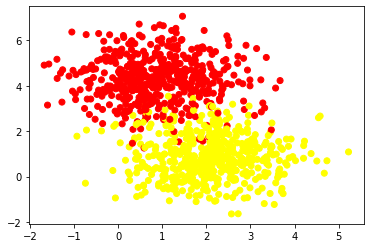

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","green","yellow"])

plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

## Dividir el conjunto de datos en Train y Test

In [3]:
from sklearn.model_selection import train_test_split

# "Data" es equivalente a X, así como "labels" son equivalentes a Y
# establecer "stratify" a una característica categórica (o el objetivo si está haciendo una clasificación, es decir, estratificar = y)
# asegura que la división se realice para preservar la proporción de categorías en la columna pasada en "stratify"
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(800, 2) (200, 2)


## Definir la red

In [4]:
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm.notebook import tqdm
import numpy as np

class RedNeuronal:
  
  def __init__(self):
    # inicializar los parámetros
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
  
  def sigmoid(self, x):
    # definir la función sigmoide
    return 1.0/(1.0 + np.exp(-x))
  

  def forward_pass(self, x):
    # método de propagación hacia adelante
    # la preactivación representada por 'a': es una suma ponderada de entradas más el sesgo
    # ls activación representada por 'h': la función de activación es la función sigmoide

    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1 # a1 = w1 * x1 + w2 * x2 + b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2 # a2 = w3 * x1 + w4 * x2 + b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3 # a3 = w5 * h1 + w6 * h2 + b3
    self.h3 = self.sigmoid(self.a3)

    # aplicar el sigmoide en a3 dará el resultado final previsto (h3)
    return self.h3
  
  def grad(self, x, y):
    # método de retropropagación
    self.forward_pass(x)
    
    self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1 # derivada de la función sigmoide self.h3*(1-self.h3) * self.h1
    self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
    self.db3 = (self.h3-y) * self.h3*(1-self.h3)
    
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
    self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
  
    self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
    self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
    self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)
  

  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    # método para ejecutar el modelo de la red
    
    # inicializar los valores de los pesos (w) y los sesgos (b)
    if initialise:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        
      m = X.shape[1]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)
   
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    # Predicción de los datos
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

## Entrenar la red

  0%|          | 0/200 [00:00<?, ?epoch/s]

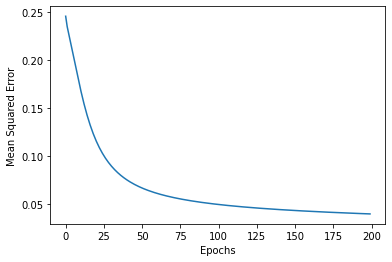

Training accuracy 0.96
Validation accuracy 0.94


In [5]:
rn = RedNeuronal()
#train the model on the data
rn.fit(X_train, Y_train, epochs=200, learning_rate=.01, display_loss=True)
#predictions
Y_pred_train = rn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = rn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)
#model performance
print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))
